In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")     # ignore unwanted warnings 

In [2]:
data= pd.read_csv('Weather Data.csv')     # import dataset

In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
data.shape

(8784, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [7]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [8]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [9]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [10]:
# Convert 'Date/Time' column to datetime
data ['Date/Time'] = pd.to_datetime(data ['Date/Time'])

In [11]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [12]:
data['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

# Data Visualisation 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

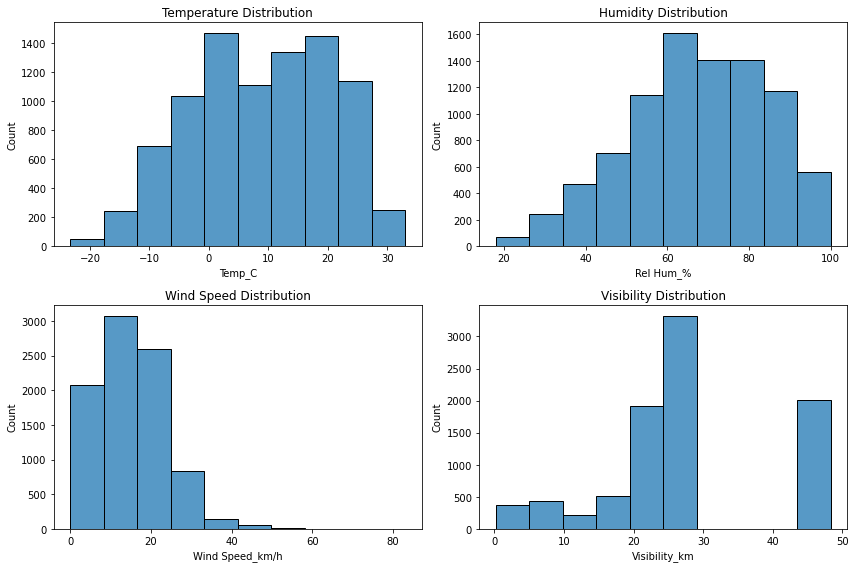

In [14]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Create histograms for temperature, humidity, wind speed, and visibility
sns.histplot(data=data, x='Temp_C', bins=10, ax=axes[0, 0])
axes[0, 0].set_title('Temperature Distribution')

sns.histplot(data=data, x='Rel Hum_%', bins=10, ax=axes[0, 1])
axes[0, 1].set_title('Humidity Distribution')

sns.histplot(data=data, x='Wind Speed_km/h', bins=10, ax=axes[1, 0])
axes[1, 0].set_title('Wind Speed Distribution')

sns.histplot(data=data, x='Visibility_km', bins=10, ax=axes[1, 1])
axes[1, 1].set_title('Visibility Distribution')

plt.tight_layout()
plt.show()

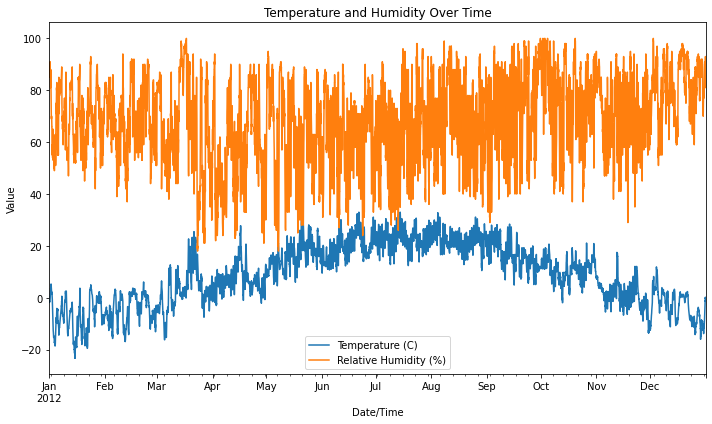

In [15]:
# Set the 'Date/Time' column as the index
data.set_index('Date/Time', inplace=True)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create line plots for temperature and humidity over time
data ['Temp_C'].plot(ax=ax, label='Temperature (C)')
data ['Rel Hum_%'].plot(ax=ax, label='Relative Humidity (%)')

# Customize the plot
ax.set_title('Temperature and Humidity Over Time')
ax.set_xlabel('Date/Time')
ax.set_ylabel('Value')
ax.legend()

plt.tight_layout()
plt.show()

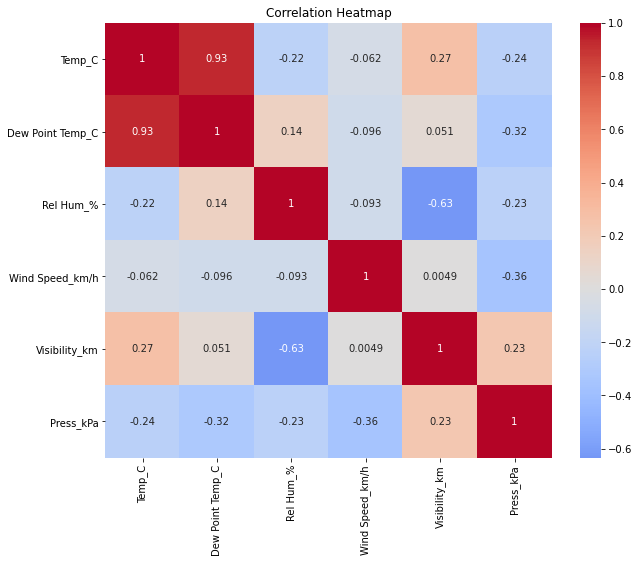

In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

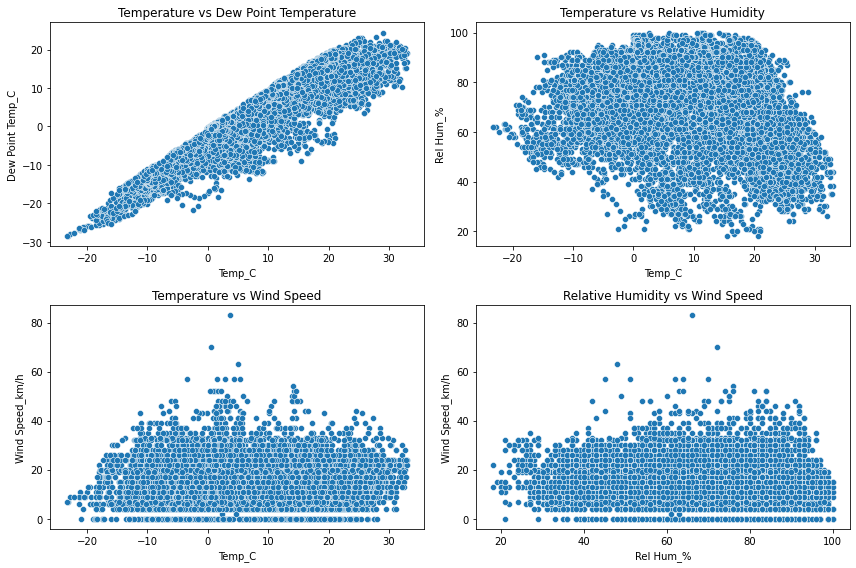

In [17]:
# Set up the figure and axes for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

# Create scatter plots to explore relationships
sns.scatterplot(data=data, x='Temp_C', y='Dew Point Temp_C', ax=axes[0, 0])
axes[0, 0].set_title('Temperature vs Dew Point Temperature')

sns.scatterplot(data=data, x='Temp_C', y='Rel Hum_%', ax=axes[0, 1])
axes[0, 1].set_title('Temperature vs Relative Humidity')

sns.scatterplot(data=data, x='Temp_C', y='Wind Speed_km/h', ax=axes[1, 0])
axes[1, 0].set_title('Temperature vs Wind Speed')

sns.scatterplot(data=data, x='Rel Hum_%', y='Wind Speed_km/h', ax=axes[1, 1])
axes[1, 1].set_title('Relative Humidity vs Wind Speed')

# Show the scatter plots
plt.tight_layout()
plt.show()

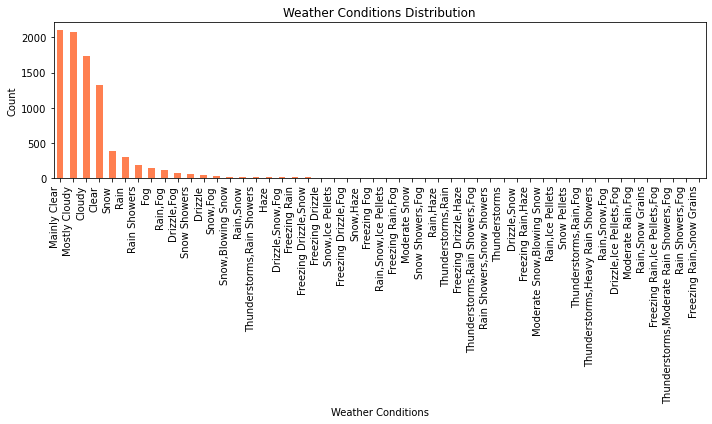

In [18]:
# Count the occurrences of each weather condition
weather_counts = data ['Weather'].value_counts()

# Set up the figure and axes for the bar plot
plt.figure(figsize=(10, 6))

# Create a bar plot of weather conditions distribution
weather_counts.plot(kind='bar', color='coral')

# Customize the plot
plt.title("Weather Conditions Distribution")
plt.xlabel("Weather Conditions")
plt.ylabel("Count")
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

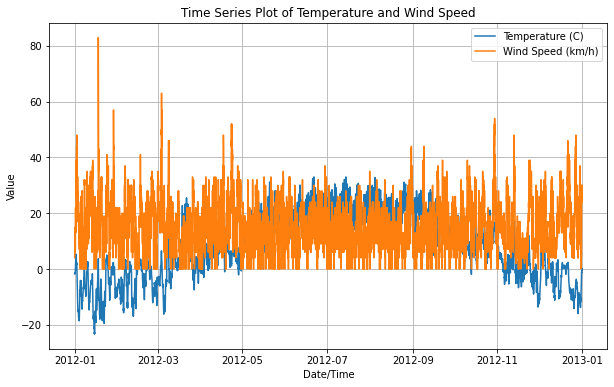

In [19]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Temp_C'], label='Temperature (C)')
plt.plot(data['Wind Speed_km/h'], label='Wind Speed (km/h)')
plt.title('Time Series Plot of Temperature and Wind Speed')
plt.xlabel('Date/Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

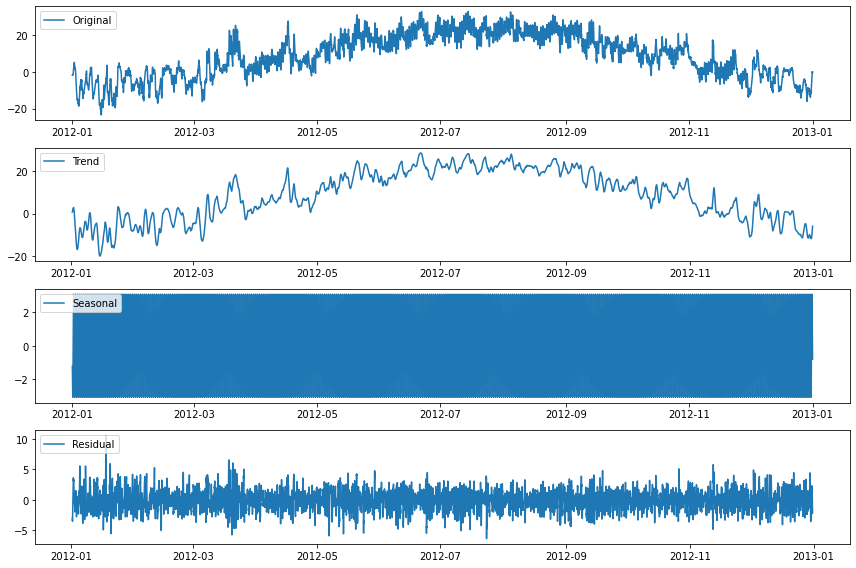

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data['Temp_C'], model='additive', freq=24)  # Assuming hourly data with a daily frequency

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Temp_C'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

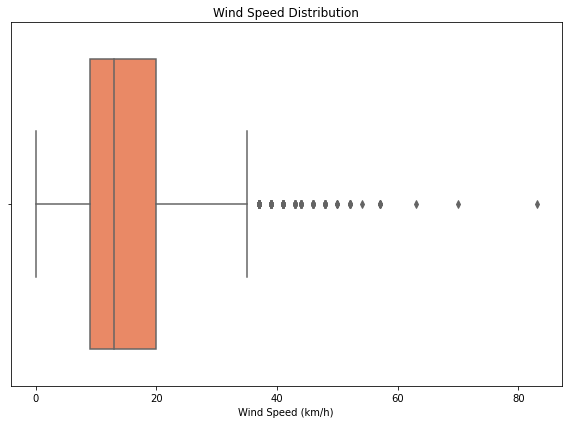

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Wind Speed_km/h'], color='coral')
plt.xlabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

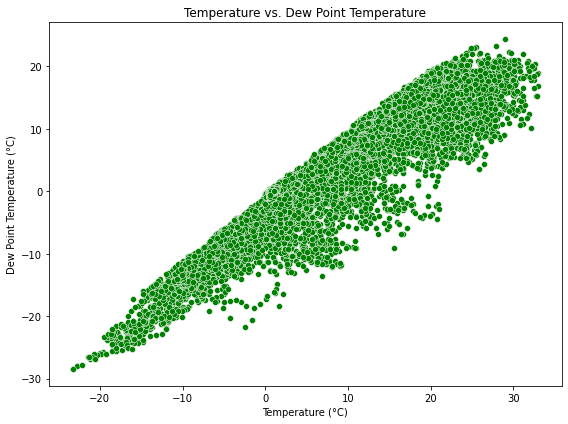

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=data, color='green')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()